In [21]:
import pandas as pd

# Filepath to the Excel file
file_path = "C:/Users/min/Desktop/DTU/3. Semester/Advanced Project in Digital Media/Experiment.xlsx"

# Read all sheets into a dictionary of DataFrames
excel_data = pd.ExcelFile(file_path)
sheets = excel_data.sheet_names  # List of sheet names

# Consolidate data from all sheets
dataframes = {}
for sheet in sheets:
    # Read the sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet)
    dataframes[sheet] = df

# Dictionary to hold guesses for each header
guesses, certainties, goodness = {}, {}, {}

# Iterate through each sheet and process the data
for sheet, df in dataframes.items():
    headers = df.columns.tolist()[1:]  # Get the column headers
    for h in headers:
        # If no list exists for the header, create one
        if h not in guesses:
            guesses[h] = []  
            certainties[h] = [] 
            goodness[h] = [] 
        # Append the data from this column
        guesses[h].append(int(df[h].iloc[0]))  
        if not df[h].iloc[3:7].dropna().empty:
            certainties[h].append(df[h][3:7].astype(int, errors='ignore').tolist())  
        if not df[h].iloc[9:13].dropna().empty:
            goodness[h].append(df[h][9:13].astype(int, errors='ignore').tolist())

answers = {
    'Bach' : 4,
    'Beethoven' : 3,
    'Chopin' : 1,
    'Liszt' : 2,
    'Mozart' : 1,
    'Schubert' : 3
}

answer_list = [val for _, val in answers.items()]

In [63]:
print('For each composer they are guessed:')
for composer, value in answers.items():
    correct = len([x for x in guesses[composer] if x == value])
    total = len(guesses[composer])
    print(f"{composer} : {correct} out {total} : {correct/total*100:.2f}%")

For each composer they are guessed:
Bach : 4 out 7 : 57.14%
Beethoven : 2 out 7 : 28.57%
Chopin : 1 out 7 : 14.29%
Liszt : 1 out 7 : 14.29%
Mozart : 2 out 7 : 28.57%
Schubert : 5 out 7 : 71.43%


In [62]:
total_cert = {composer: {i: 0 for i in range(1, 5)} for composer in certainties}
total_good = {composer: {i: 0 for i in range(1, 5)} for composer in goodness}


for composer, values in certainties.items():
    total_cert[composer] = {
        i: sum(v[i - 1] for v in values if len(v) >= i and pd.notnull(v[i - 1])) / len(values)
        for i in range(1, 5)
    }

for composer, values in goodness.items():
    total_good[composer] = {
        i: sum(v[i - 1] for v in values if len(v) >= i and pd.notnull(v[i - 1])) / len(values)
        for i in range(1, 5)
    }

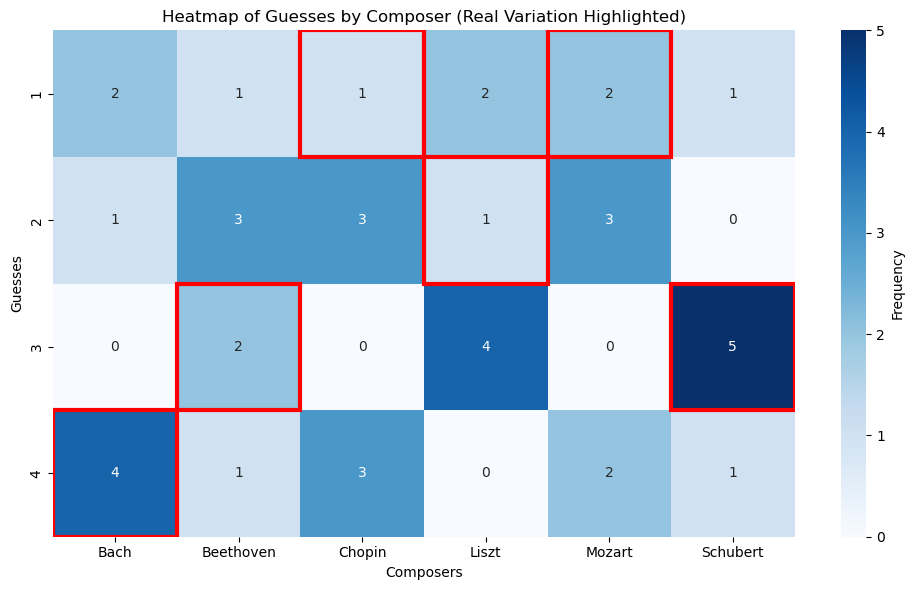

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
data = guesses
composers = list(data.keys())
scores = [1, 2, 3, 4]
# Prepare data
heatmap_data = np.array([[
    Counter(data[composer]).get(score, 0) for score in scores
] for composer in composers]).T

highlight_indices = [scores.index(h) for h in answer_list]  # Convert guesses to row indices

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=composers,
    yticklabels=scores,
    cbar_kws={'label': 'Frequency'},
    ax=ax,
    mask=np.zeros_like(heatmap_data, dtype=bool),  # Ensure full data is displayed
)

# Highlight specific cells
for col, row in enumerate(highlight_indices):
    ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=False, edgecolor='red', lw=3))

# Labels
ax.set_xlabel('Composers')
ax.set_ylabel('Guesses')
ax.set_title('Heatmap of Guesses by Composer (Real Variation Highlighted)')
plt.tight_layout()
plt.show()


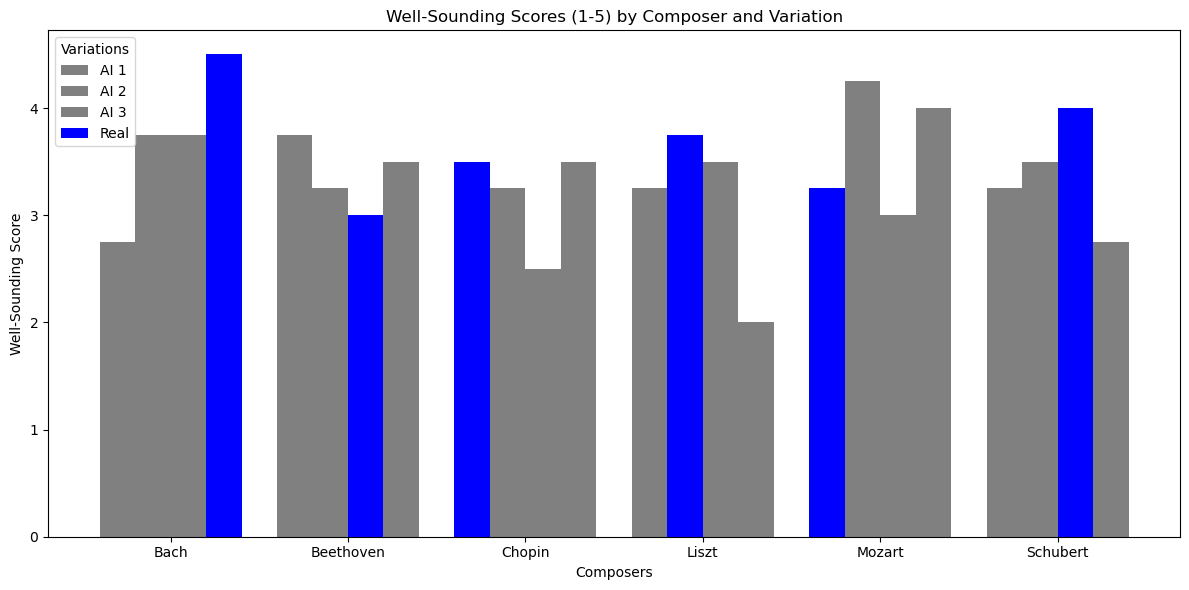

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = total_good

# Columns to highlight for each composer
highlight = answer_list

# Prepare data
composers = list(data.keys())
examples = list(range(1, 5))  # Example 1 to 4
scores = np.array([[data[composer][example] for example in examples] for composer in composers])

# Plot
x = np.arange(len(composers))  # Composers as the x-axis positions
width = 0.2  # Bar width
colors = ['gray', 'blue']  # Default and highlight colors

fig, ax = plt.subplots(figsize=(12, 6))

labels = ['AI 1', 'AI 2', 'AI 3', 'Real']

# Create bars for each example
for i, example in enumerate(examples):
    # Highlight color if the example matches the highlight column for the composer
    bar_colors = [
        colors[1] if example == highlight[j] else colors[0] 
        for j in range(len(composers))
    ]
    ax.bar(x + i * width, scores[:, i], width, label=f'{labels[i]}', color=bar_colors)

# Add labels, title, and legend
ax.set_xlabel('Composers')
ax.set_ylabel('Well-Sounding Score')
ax.set_title('Well-Sounding Scores (1-5) by Composer and Variation')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(composers)
ax.legend(title='Variations', loc="upper left")

plt.tight_layout()
plt.show()


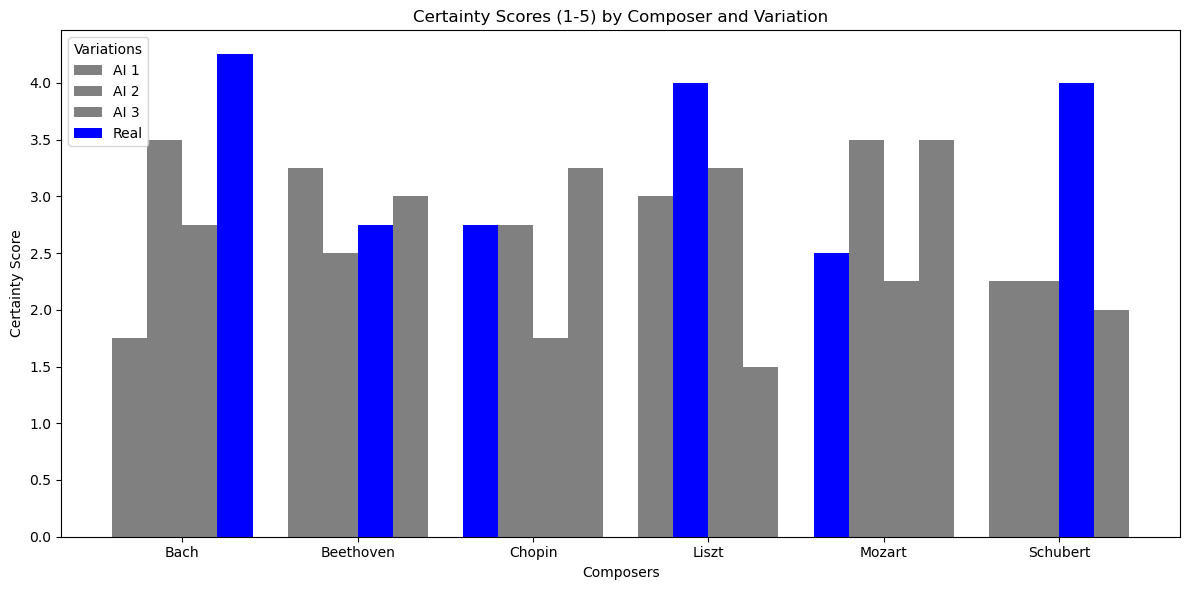

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = total_cert

# Columns to highlight for each composer
highlight = answer_list

# Prepare data
composers = list(data.keys())
examples = list(range(1, 5))  # Example 1 to 4
scores = np.array([[data[composer][example] for example in examples] for composer in composers])

# Plot
x = np.arange(len(composers))  # Composers as the x-axis positions
width = 0.2  # Bar width
colors = ['gray', 'blue']  # Default and highlight colors

fig, ax = plt.subplots(figsize=(12, 6))

labels = ['AI 1', 'AI 2', 'AI 3', 'Real']

# Create bars for each example
for i, example in enumerate(examples):
    # Highlight color if the example matches the highlight column for the composer
    bar_colors = [
        colors[1] if example == highlight[j] else colors[0] 
        for j in range(len(composers))
    ]
    ax.bar(x + i * width, scores[:, i], width, label=f'{labels[i]}', color=bar_colors)

# Add labels, title, and legend
ax.set_xlabel('Composers')
ax.set_ylabel('Certainty Score')
ax.set_title('Certainty Scores (1-5) by Composer and Variation')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(composers)
ax.legend(title='Variations', loc='upper left')

plt.tight_layout()
plt.show()